In [107]:
from random import gauss
import matplotlib.pyplot as plt
import numpy as np 
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [108]:
# create dataset
n = 1000
omega = 0.5

alpha_1 = 0.1
alpha_2 = 0.2
beta_1 = 0.3
beta_2 = 0.4 

test_size = int(n*0.1)

series = [gauss(0, 1), gauss(0, 1)]
vols = [1, 1]

for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*series[-1]**2 + alpha_2*series[-2]**2 + beta_1*vols[-1]**2 + beta_2*vols[-2]**2)
    new_val = gauss(0,1) * new_vol
    
    vols.append(new_vol)
    series.append(new_val)

Text(0.5, 1.0, 'Simulated GARCH(2, 2) Data')

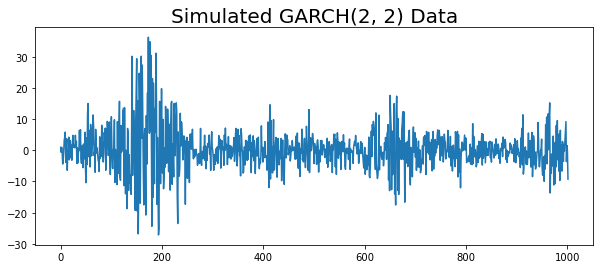

In [109]:
plt.figure(figsize = (10, 4))
plt.plot(series)
plt.title('Simulated GARCH(2, 2) Data', fontsize = 20)

Text(0.5, 1.0, 'Data Volatility')

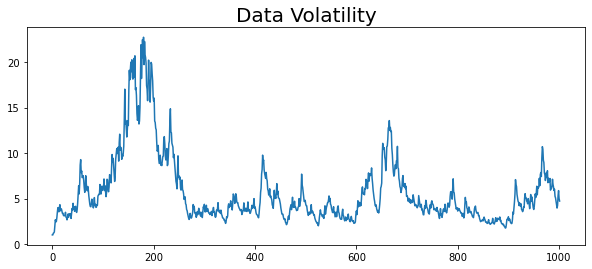

In [110]:
plt.figure(figsize = (10, 4))
plt.plot(vols)
plt.title('Data Volatility', fontsize = 20)

Text(0.5, 1.0, 'Data and volatility')

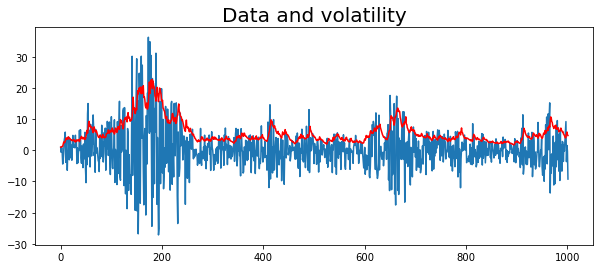

In [111]:
plt.figure(figsize = (10, 4))
plt.plot(series)
plt.plot(vols, color = 'red')
plt.title('Data and volatility', fontsize = 20)

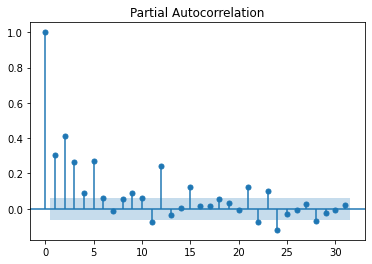

In [112]:
#pacf plot
plot_pacf(np.array(series)**2)
plt.show()

In [113]:
#fit the garch model

In [114]:
train, test = series[:-test_size], series[-test_size:]


In [115]:
model = arch_model(train, p =2, q = 2)

In [116]:
model_fit = model.fit(disp = 'off')

In [117]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                      -0.003
Mean Model:             Constant Mean   Adj. R-squared:                 -0.003
Vol Model:                      GARCH   Log-Likelihood:               -2712.97
Distribution:                  Normal   AIC:                           5437.95
Method:            Maximum Likelihood   BIC:                           5466.78
                                        No. Observations:                  902
Date:                Mon, Oct 25 2021   Df Residuals:                      896
Time:                        13:29:33   Df Model:                            6
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0257      0.125     -0.206      0.837 [ -0.271,  0.219]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.7094      0.321      2.211  2.705e-02  [8.049e-02,  1.338]
alpha[1]       0.1126  4.169e-02      2.700  6.940e-03  [3.084e-02,  0.194]
alpha[2]       0.1289  7.995e-02      1.613      0.107 [-2.777e-02,  0.286]
beta[1]        0.4722      0.383      1.233      0.218    [ -0.279,  1.223]
beta[2]        0.2711      0.318      0.851      0.395    [ -0.353,  0.895]
===========================================================================

Covariance estimator: robust
"""

In [118]:
#predict 
predictions = model_fit.forecast(horizon = test_size)

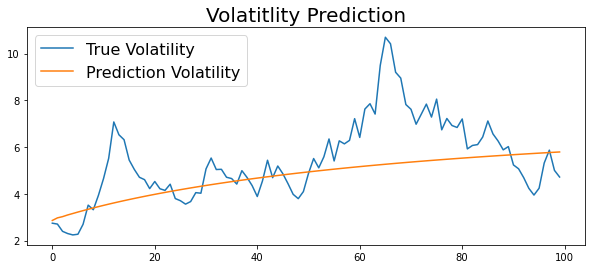

In [119]:
plt.figure(figsize = (10, 4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatitlity Prediction', fontsize = 20)
plt.legend(['True Volatility', 'Prediction Volatility'], fontsize = 16)

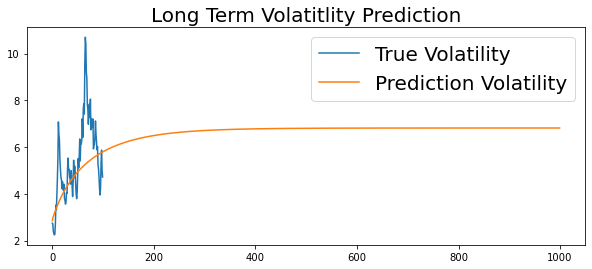

In [120]:
#long term 
#predict 
predictions = model_fit.forecast(horizon = 1000)
plt.figure(figsize = (10, 4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Long Term Volatitlity Prediction', fontsize = 20)
plt.legend(['True Volatility', 'Prediction Volatility'], fontsize = 20)

In [121]:
#rolling forecast origin 
rolling_predictions = []
for i in range(test_size):
    train = series[:-(test_size-i)]
    model = arch_model(train, p = 2, q = 2)
    model_fit = model.fit(disp = 'off')
    pred = model_fit.forecast(horizon = 1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1, :]))

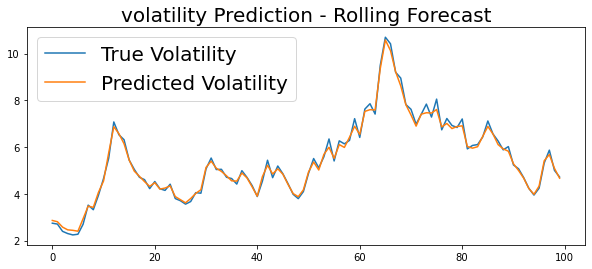

In [122]:
plt.figure(figsize = (10, 4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('volatility Prediction - Rolling Forecast', fontsize = 20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize = 20)